## Plots delays, throughputs, packet loss and path for a selected link

In [127]:
%matplotlib inline
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from datetime import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib import gridspec
from datetime import datetime
import numpy as np
import pandas as pd

es = Elasticsearch(['atlas-kibana.mwt2.org:9200'],timeout=60)
indices = "network_weather-2017.5.*"

my_query = {}

from sklearn import tree

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc

import time
from sklearn.model_selection import train_test_split

import random

from pandas.tseries.offsets import *

#from graphviz import Source

##  Select your link

In [128]:
# sS='UC'
# srcSiteOWDServer = "192.170.227.160"
# srcSiteThroughputServer = "192.170.227.162"

sS1= 'pic'
srcSiteOWDServer1 = "193.109.172.188"
#srcSiteThroughputServer = "128.142.223.246"

sS2= 'pic'
srcSiteOWDServer2 = "193.109.172.188"

sS3= 'pic'
srcSiteOWDServer3 = "193.109.172.188"

sS4= 'pic'
srcSiteOWDServer4 = "193.109.172.188"

sS5= 'pic'
srcSiteOWDServer5 = "193.109.172.188"

# dS='IU'
# destSiteOWDServer = "149.165.225.223"
# destSiteThroughputServer = "149.165.225.224"

# dS='UIUC'
# destSiteOWDServer = "72.36.96.4"
# destSiteThroughputServer = "72.36.96.9"

# dS='ICCN'
# destSiteOWDServer = "72.36.96.4"
# destSiteThroughputServer = "72.36.126.132"

dS1 = 'CERN-PROD'
destSiteOWDServer1 = "128.142.223.247"
#destSiteThroughputServer = "193.109.172.187"

dS2 = 'FZK-LCG2'
destSiteOWDServer2 = "192.108.47.12"

dS3 = 'UFlorida-HPC'
destSiteOWDServer3 = "128.227.221.44"

dS4 = 'UKI-NORTHGRID-MAN-HEP'
destSiteOWDServer4 = "195.194.105.178"

dS5 = 'CSCS-LCG2'
destSiteOWDServer5 = "148.187.64.25"

## Get the data from Elasticsearch, and store the record based on its type

In [129]:
start_date = '2017-05-13 00:00:00'
end_date = '2017-05-17 00:00:00'

start = pd.Timestamp(start_date)
end   = pd.Timestamp(end_date)

my_query1 = {
    'query': { 
       'bool':{
            'must':[
                    {'range': {'timestamp': {'gte': start.strftime('%Y%m%dT%H%M00Z'), 'lt': end.strftime('%Y%m%dT%H%M00Z')}}},
                        {'bool':
                            {'should':[
                                {'term': {'src': srcSiteOWDServer1}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'dest': destSiteOWDServer1}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'_type': 'packet_loss_rate'}},
                                {'term': {'_type': 'latency'}}
                            ]}
                        }
                    ]
                }
        
        }
    }


scroll1 = list(scan(client=es, index=indices, query=my_query1))

In [130]:
my_query2 = {
    'query': { 
       'bool':{
            'must':[
                    {'range': {'timestamp': {'gte': start.strftime('%Y%m%dT%H%M00Z'), 'lt': end.strftime('%Y%m%dT%H%M00Z')}}},
                        {'bool':
                            {'should':[
                                {'term': {'src': srcSiteOWDServer2}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'dest': destSiteOWDServer2}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'_type': 'packet_loss_rate'}},
                                {'term': {'_type': 'latency'}}
                            ]}
                        }
                    ]
                }
        
        }
    }


scroll2 = list(scan(client=es, index=indices, query=my_query2))

In [131]:
my_query3 = {
    'query': { 
       'bool':{
            'must':[
                    {'range': {'timestamp': {'gte': start.strftime('%Y%m%dT%H%M00Z'), 'lt': end.strftime('%Y%m%dT%H%M00Z')}}},
                        {'bool':
                            {'should':[
                                {'term': {'src': srcSiteOWDServer3}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'dest': destSiteOWDServer3}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'_type': 'packet_loss_rate'}},
                                {'term': {'_type': 'latency'}}
                            ]}
                        }
                    ]
                }
        
        }
    }


scroll3 = list(scan(client=es, index=indices, query=my_query3))

In [132]:
my_query4 = {
    'query': { 
       'bool':{
            'must':[
                    {'range': {'timestamp': {'gte': start.strftime('%Y%m%dT%H%M00Z'), 'lt': end.strftime('%Y%m%dT%H%M00Z')}}},
                        {'bool':
                            {'should':[
                                {'term': {'src': srcSiteOWDServer4}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'dest': destSiteOWDServer4}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'_type': 'packet_loss_rate'}},
                                {'term': {'_type': 'latency'}}
                            ]}
                        }
                    ]
                }
        
        }
    }


scroll4 = list(scan(client=es, index=indices, query=my_query4))

In [133]:
my_query5 = {
    'query': { 
       'bool':{
            'must':[
                    {'range': {'timestamp': {'gte': start.strftime('%Y%m%dT%H%M00Z'), 'lt': end.strftime('%Y%m%dT%H%M00Z')}}},
                        {'bool':
                            {'should':[
                                {'term': {'src': srcSiteOWDServer5}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'dest': destSiteOWDServer5}},
                            ]}
                        },
                        {'bool':
                            {'should':[
                                {'term': {'_type': 'packet_loss_rate'}},
                                {'term': {'_type': 'latency'}}
                            ]}
                        }
                    ]
                }
        
        }
    }


scroll5 = list(scan(client=es, index=indices, query=my_query5))

In [134]:
#my_query5 = {
#    'query': { 
#       'bool':{
#            'must':[
#                    {'range': {'timestamp': {'gte': '20170513T000000Z', 'lt': '20170520T000000Z'}}},
#                        {'bool':
#                            {'should':[
#                                {'term': {'src': srcSiteOWDServer5}},
#                            ]}
#                        },
#                        {'bool':
#                            {'should':[
#                                {'term': {'dest': destSiteOWDServer5}},
#                            ]}
#                        },
#                        {'bool':
#                            {'should':[
#                                {'term': {'_type': 'packet_loss_rate'}},
#                                {'term': {'_type': 'latency'}}
#                            ]}
#                        }
#                    ]
#                }
#        
#        }
#    }


#scroll5 = list(scan(client=es, index=indices, query=my_query5))

In [135]:
site1 = {srcSiteOWDServer1: sS1, destSiteOWDServer1:dS1}
data1 = {sS1:pd.DataFrame(),dS1:pd.DataFrame()}
epoch = datetime.utcfromtimestamp(0)
count = 0
print(epoch)

for res in scroll1:
    if count<10: print(res)
    count += 1
#     dt=datetime.strptime(res['_source']['timestamp'], '%Y-%m-%dT%H:%M:%S') # for data before Oct. 15 2016
    dt=datetime.utcfromtimestamp(res['_source']['timestamp']/1000.0)
    ts = (dt - epoch).total_seconds() * 1000.0
    s=site1[res['_source']['src']]
    data1[s].set_value(ts, 'timestamp', dt)
    column_type = res['_type']
    if column_type == 'latency':
        data1[s].set_value( ts, 'delay_median', res['_source']['delay_median'])
        data1[s].set_value( ts, 'delay_mean', res['_source']['delay_mean'])
        data1[s].set_value( ts, 'delay_sd', res['_source']['delay_sd'])
    elif column_type == 'packet_loss_rate':
        data1[s].set_value( ts, 'packet_loss', res['_source']['packet_loss'])
    #if count<2: print(dt)

1970-01-01 00:00:00
{'_score': None, 'sort': [11051], '_index': 'network_weather-2017.5.15', '_id': 'AVwJqNEcKw5l0ihipPQJ', '_source': {'delay_median': 15.12, 'timestamp': 1494808451000, 'destProduction': True, 'delay_mean': 15.614799999999999, 'srcSite': 'pic', 'destVO': 'ATLAS', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '128.142.223.247', 'delay_sd': 1.7956837026603545, 'destSite': 'CERN-PROD', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [11052], '_index': 'network_weather-2017.5.15', '_id': 'AVwJqNEcKw5l0ihipPQN', '_source': {'delay_median': 15.07, 'timestamp': 1494808669000, 'destProduction': True, 'delay_mean': 15.3378, 'srcSite': 'pic', 'destVO': 'ATLAS', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '128.142.223.247', 'delay_sd': 5.189017937914649, 'destSite': 'CERN-PROD', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [11053], '_index': 'network_weather-2017.5.15', '

In [136]:
site2 = {srcSiteOWDServer2: sS2, destSiteOWDServer2:dS2}
data2 = {sS2:pd.DataFrame(),dS2:pd.DataFrame()}
epoch = datetime.utcfromtimestamp(0)
count = 0
print(epoch)

for res in scroll2:
    if count<10: print(res)
    count += 1
#     dt=datetime.strptime(res['_source']['timestamp'], '%Y-%m-%dT%H:%M:%S') # for data before Oct. 15 2016
    dt=datetime.utcfromtimestamp(res['_source']['timestamp']/1000.0)
    ts = (dt - epoch).total_seconds() * 1000.0
    s=site2[res['_source']['src']]
    data2[s].set_value(ts, 'timestamp', dt)
    column_type = res['_type']
    if column_type == 'latency':
        data2[s].set_value( ts, 'delay_median', res['_source']['delay_median'])
        data2[s].set_value( ts, 'delay_mean', res['_source']['delay_mean'])
        data2[s].set_value( ts, 'delay_sd', res['_source']['delay_sd'])
    elif column_type == 'packet_loss_rate':
        data2[s].set_value( ts, 'packet_loss', res['_source']['packet_loss'])
    #if count<2: print(dt)

1970-01-01 00:00:00
{'_score': None, 'sort': [6011], '_index': 'network_weather-2017.5.15', '_id': 'AVwJpmVBKw5l0ihiomWe', '_source': {'MA': '193.109.172.188', 'destVO': 'ATLAS', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '192.108.47.12', 'destProduction': True, 'destSite': 'FZK-LCG2', 'packet_loss': 0.0, 'srcVO': 'ATLAS', 'srcSite': 'pic', 'timestamp': 1494808491000}, '_type': 'packet_loss_rate'}
{'_score': None, 'sort': [6012], '_index': 'network_weather-2017.5.15', '_id': 'AVwJpmVBKw5l0ihiomWg', '_source': {'MA': '193.109.172.188', 'destVO': 'ATLAS', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '192.108.47.12', 'destProduction': True, 'destSite': 'FZK-LCG2', 'packet_loss': 0.0, 'srcVO': 'ATLAS', 'srcSite': 'pic', 'timestamp': 1494808010000}, '_type': 'packet_loss_rate'}
{'_score': None, 'sort': [6013], '_index': 'network_weather-2017.5.15', '_id': 'AVwJpmVBKw5l0ihiomWj', '_source': {'MA': '193.109.172.188', 'destVO': 'ATLAS', 'srcProduction': True, 'src': '

In [137]:
site3 = {srcSiteOWDServer3: sS3, destSiteOWDServer3:dS3}
data3 = {sS3:pd.DataFrame(),dS3:pd.DataFrame()}
epoch = datetime.utcfromtimestamp(0)
count = 0
print(epoch)

for res in scroll3:
    if count<10: print(res)
    count += 1
#     dt=datetime.strptime(res['_source']['timestamp'], '%Y-%m-%dT%H:%M:%S') # for data before Oct. 15 2016
    dt=datetime.utcfromtimestamp(res['_source']['timestamp']/1000.0)
    ts = (dt - epoch).total_seconds() * 1000.0
    s=site3[res['_source']['src']]
    data3[s].set_value(ts, 'timestamp', dt)
    column_type = res['_type']
    if column_type == 'latency':
        data3[s].set_value( ts, 'delay_median', res['_source']['delay_median'])
        data3[s].set_value( ts, 'delay_mean', res['_source']['delay_mean'])
        data3[s].set_value( ts, 'delay_sd', res['_source']['delay_sd'])
    elif column_type == 'packet_loss_rate':
        data3[s].set_value( ts, 'packet_loss', res['_source']['packet_loss'])
    #if count<2: print(dt)

1970-01-01 00:00:00
{'_score': None, 'sort': [102816], '_index': 'network_weather-2017.5.16', '_id': 'AVwOmaR6Kw5l0ihi1OGw', '_source': {'delay_median': 81.68, 'timestamp': 1494892966000, 'destProduction': True, 'delay_mean': 81.69635, 'srcSite': 'pic', 'destVO': '', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '128.227.221.44', 'delay_sd': 0.08406848894403471, 'destSite': 'UFlorida-HPC', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [102817], '_index': 'network_weather-2017.5.16', '_id': 'AVwOmaR6Kw5l0ihi1OGy', '_source': {'delay_median': 81.67, 'timestamp': 1494893327000, 'destProduction': True, 'delay_mean': 81.67571666666667, 'srcSite': 'pic', 'destVO': '', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '128.227.221.44', 'delay_sd': 0.06304881486241898, 'destSite': 'UFlorida-HPC', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [102818], '_index': 'network_weather-2017.5.16', '

In [138]:
site4 = {srcSiteOWDServer4: sS4, destSiteOWDServer4:dS4}
data4 = {sS4:pd.DataFrame(),dS4:pd.DataFrame()}
epoch = datetime.utcfromtimestamp(0)
count = 0
print(epoch)

for res in scroll4:
    if count<10: print(res)
    count += 1
#     dt=datetime.strptime(res['_source']['timestamp'], '%Y-%m-%dT%H:%M:%S') # for data before Oct. 15 2016
    dt=datetime.utcfromtimestamp(res['_source']['timestamp']/1000.0)
    ts = (dt - epoch).total_seconds() * 1000.0
    s=site4[res['_source']['src']]
    data4[s].set_value(ts, 'timestamp', dt)
    column_type = res['_type']
    if column_type == 'latency':
        data4[s].set_value( ts, 'delay_median', res['_source']['delay_median'])
        data4[s].set_value( ts, 'delay_mean', res['_source']['delay_mean'])
        data4[s].set_value( ts, 'delay_sd', res['_source']['delay_sd'])
    elif column_type == 'packet_loss_rate':
        data4[s].set_value( ts, 'packet_loss', res['_source']['packet_loss'])
    #if count<2: print(dt)

1970-01-01 00:00:00
{'_score': None, 'sort': [104207], '_index': 'network_weather-2017.5.16', '_id': 'AVwOmtSzKw5l0ihi1jz8', '_source': {'delay_median': 26.28, 'timestamp': 1494893117000, 'destProduction': True, 'delay_mean': 26.244266666666665, 'srcSite': 'pic', 'destVO': 'ATLAS', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '195.194.105.178', 'delay_sd': 0.08704543317737697, 'destSite': 'UKI-NORTHGRID-MAN-HEP', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [104375], '_index': 'network_weather-2017.5.16', '_id': 'AVwOms6vKw5l0ihi1jYo', '_source': {'MA': '193.109.172.188', 'destVO': 'ATLAS', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '195.194.105.178', 'destProduction': True, 'destSite': 'UKI-NORTHGRID-MAN-HEP', 'packet_loss': 0.0, 'srcVO': 'ATLAS', 'srcSite': 'pic', 'timestamp': 1494892937000}, '_type': 'packet_loss_rate'}
{'_score': None, 'sort': [112464], '_index': 'network_weather-2017.5.16', '_id': 'AVwOmtSzKw5l0

In [139]:
site5 = {srcSiteOWDServer5: sS5, destSiteOWDServer5:dS5}
data5 = {sS5:pd.DataFrame(),dS5:pd.DataFrame()}
epoch = datetime.utcfromtimestamp(0)
count = 0
print(epoch)

for res in scroll5:
    if count<10: print(res)
    count += 1
#     dt=datetime.strptime(res['_source']['timestamp'], '%Y-%m-%dT%H:%M:%S') # for data before Oct. 15 2016
    dt=datetime.utcfromtimestamp(res['_source']['timestamp']/1000.0)
    ts = (dt - epoch).total_seconds() * 1000.0
    s=site5[res['_source']['src']]
    data5[s].set_value(ts, 'timestamp', dt)
    column_type = res['_type']    
    if column_type == 'latency':
        data5[s].set_value( ts, 'delay_median', res['_source']['delay_median'])
        data5[s].set_value( ts, 'delay_mean', res['_source']['delay_mean'])
        data5[s].set_value( ts, 'delay_sd', res['_source']['delay_sd'])
    elif column_type == 'packet_loss_rate':
        data5[s].set_value( ts, 'packet_loss', res['_source']['packet_loss'])
    #if count<2: print(dt)

1970-01-01 00:00:00
{'_score': None, 'sort': [102796], '_index': 'network_weather-2017.5.16', '_id': 'AVwOmaR5Kw5l0ihi1OCW', '_source': {'delay_median': 18.27, 'timestamp': 1494892857000, 'destProduction': True, 'delay_mean': 18.943416666666668, 'srcSite': 'pic', 'destVO': 'ATLAS', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '148.187.64.25', 'delay_sd': 7.073545798234591, 'destSite': 'CSCS-LCG2', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [102797], '_index': 'network_weather-2017.5.16', '_id': 'AVwOmaR5Kw5l0ihi1OCg', '_source': {'delay_median': 18.32, 'timestamp': 1494893458000, 'destProduction': True, 'delay_mean': 18.44493333333333, 'srcSite': 'pic', 'destVO': 'ATLAS', 'MA': '193.109.172.188', 'srcProduction': True, 'src': '193.109.172.188', 'dest': '148.187.64.25', 'delay_sd': 2.8122496325105204, 'destSite': 'CSCS-LCG2', 'srcVO': 'ATLAS'}, '_type': 'latency'}
{'_score': None, 'sort': [103064], '_index': 'network_weather-2017

In [140]:
# print("hi")
# exit()

In [141]:
data1[sS1].sort_index(inplace=True) 
data1[sS1].describe()

print(data1[sS1])

                       timestamp  delay_median  delay_mean    delay_sd  \
1.494729e+12 2017-05-14 02:31:55         15.09   15.136950    0.387190   
1.494729e+12 2017-05-14 02:32:55         15.10   15.428317    5.173534   
1.494729e+12 2017-05-14 02:33:55         15.10   15.129333    0.265368   
1.494729e+12 2017-05-14 02:35:00         15.12   15.150333    0.185216   
1.494729e+12 2017-05-14 02:35:22         15.15   15.188483    0.276396   
1.494729e+12 2017-05-14 02:36:05         15.15   15.210433    1.130259   
1.494729e+12 2017-05-14 02:36:22         15.16   15.189717    0.242301   
1.494729e+12 2017-05-14 02:37:05         15.17   15.188983    0.117793   
1.494729e+12 2017-05-14 02:37:22         15.17   15.208667    0.474655   
1.494729e+12 2017-05-14 02:38:05         15.20   16.370100   19.830379   
1.494730e+12 2017-05-14 02:38:22         15.22   15.242250    0.248374   
1.494730e+12 2017-05-14 02:39:05         15.23   15.254967    0.144559   
1.494730e+12 2017-05-14 02:39:22      

In [142]:
data2[sS2].sort_index(inplace=True) 
data2[sS2].describe()

print(data2[sS2])

                       timestamp  packet_loss  delay_median  delay_mean  \
1.494729e+12 2017-05-14 02:31:39     0.001667        20.240   20.220467   
1.494729e+12 2017-05-14 02:32:39     0.000000        20.240   20.324167   
1.494729e+12 2017-05-14 02:33:39     0.000000        20.240   21.234417   
1.494729e+12 2017-05-14 02:34:39     0.000000        20.250   20.356500   
1.494729e+12 2017-05-14 02:35:01     0.001667        20.250   20.248133   
1.494729e+12 2017-05-14 02:35:39     0.000000        20.250   20.875483   
1.494729e+12 2017-05-14 02:36:06     0.000000        20.260   20.269683   
1.494729e+12 2017-05-14 02:36:39     0.000000        20.270   20.304133   
1.494729e+12 2017-05-14 02:37:06     0.000000        20.270   20.487167   
1.494729e+12 2017-05-14 02:37:39     0.000000        20.280   27.220533   
1.494729e+12 2017-05-14 02:38:06     0.000000        20.290   21.764033   
1.494730e+12 2017-05-14 02:38:39     0.000000        20.290   20.718717   
1.494730e+12 2017-05-14 0

In [143]:
data3[sS3].sort_index(inplace=True) 
data3[sS3].describe()

print(data3[sS3])

                       timestamp  delay_median  delay_mean   delay_sd  \
1.494729e+12 2017-05-14 02:34:02        81.710   81.726517   0.113680   
1.494729e+12 2017-05-14 02:35:02        81.730   81.741833   0.093766   
1.494729e+12 2017-05-14 02:36:02        81.740   82.697067  12.679230   
1.494729e+12 2017-05-14 02:37:07        81.770   81.782783   0.160875   
1.494729e+12 2017-05-14 02:38:07        81.810   81.816883   0.045783   
1.494730e+12 2017-05-14 02:39:07        81.840   81.851617   0.106472   
1.494730e+12 2017-05-14 02:40:07        81.870   82.028150   2.994046   
1.494730e+12 2017-05-14 02:41:07        81.870   81.888783   0.141546   
1.494730e+12 2017-05-14 02:42:07        81.820   81.836383   0.148157   
1.494730e+12 2017-05-14 02:43:07        81.850   81.854700   0.031084   
1.494730e+12 2017-05-14 02:44:07        81.880   81.883367   0.061305   
1.494730e+12 2017-05-14 02:45:08        81.890   81.900867   0.114826   
1.494730e+12 2017-05-14 02:46:08        81.910   81

In [144]:
data4[sS4].sort_index(inplace=True) 
data4[sS4].describe()

print(data4[sS4])

                       timestamp  delay_median  delay_mean  delay_sd  \
1.494839e+12 2017-05-15 09:05:37        45.245   30.203150  2.740382   
1.494839e+12 2017-05-15 09:06:38        43.990   29.651533  3.082243   
1.494839e+12 2017-05-15 09:07:38        26.010   26.067783  0.202491   
1.494839e+12 2017-05-15 09:08:38        26.010   26.036300  0.224048   
1.494839e+12 2017-05-15 09:09:38        26.040   26.054967  0.177889   
1.494839e+12 2017-05-15 09:10:38        26.110   27.887783  2.819689   
1.494839e+12 2017-05-15 09:11:38        47.170   31.839617  4.085094   
1.494840e+12 2017-05-15 09:12:38        47.420   31.540400  2.586743   
1.494840e+12 2017-05-15 09:13:38        46.825   31.075983  2.741969   
1.494840e+12 2017-05-15 09:14:38        47.585   31.573800  2.552196   
1.494840e+12 2017-05-15 09:15:38        48.145   31.693700  2.649607   
1.494840e+12 2017-05-15 09:16:38        47.755   31.506450  2.787577   
1.494840e+12 2017-05-15 09:17:38        47.385   31.455917  2.52

In [145]:
data5[sS5].sort_index(inplace=True) 
data5[sS5].describe()

print(data5[sS5])

                       timestamp  delay_median  delay_mean    delay_sd  \
1.494729e+12 2017-05-14 02:33:40        17.830   18.272067    7.584541   
1.494729e+12 2017-05-14 02:34:40        17.830   21.435283   29.728602   
1.494729e+12 2017-05-14 02:35:40        17.830   18.034967    4.045727   
1.494729e+12 2017-05-14 02:36:40        17.830   20.694533   25.233359   
1.494729e+12 2017-05-14 02:37:40        17.840   21.628000   29.502644   
1.494730e+12 2017-05-14 02:38:40        17.840   22.732350   28.506157   
1.494730e+12 2017-05-14 02:39:40        17.850   19.904550   20.209153   
1.494730e+12 2017-05-14 02:40:40        17.850   23.115300   40.569899   
1.494730e+12 2017-05-14 02:41:40        17.860   22.951800   42.810355   
1.494730e+12 2017-05-14 02:42:40        17.860   19.662317   17.363608   
1.494730e+12 2017-05-14 02:43:41        17.860   21.792867   51.506835   
1.494730e+12 2017-05-14 02:44:41        17.870   18.765133    9.160692   
1.494730e+12 2017-05-14 02:45:41      

### Extract values

In [146]:
F1 = data1[sS1]
Fpl1 = F1[F1.packet_loss.notnull()]
Fd1 = F1[F1.delay_mean.notnull()]

#print(Fpl)
print(Fpl1)

                       timestamp  delay_median  delay_mean    delay_sd  \
1.494729e+12 2017-05-14 02:31:55         15.09   15.136950    0.387190   
1.494729e+12 2017-05-14 02:32:55         15.10   15.428317    5.173534   
1.494729e+12 2017-05-14 02:33:55         15.10   15.129333    0.265368   
1.494729e+12 2017-05-14 02:35:00         15.12   15.150333    0.185216   
1.494729e+12 2017-05-14 02:35:22         15.15   15.188483    0.276396   
1.494729e+12 2017-05-14 02:36:05         15.15   15.210433    1.130259   
1.494729e+12 2017-05-14 02:36:22         15.16   15.189717    0.242301   
1.494729e+12 2017-05-14 02:37:05         15.17   15.188983    0.117793   
1.494729e+12 2017-05-14 02:37:22         15.17   15.208667    0.474655   
1.494729e+12 2017-05-14 02:38:05         15.20   16.370100   19.830379   
1.494730e+12 2017-05-14 02:38:22         15.22   15.242250    0.248374   
1.494730e+12 2017-05-14 02:39:05         15.23   15.254967    0.144559   
1.494730e+12 2017-05-14 02:39:22      

In [147]:
F2 = data2[sS2]
Fpl2 = F2[F2.packet_loss.notnull()]
Fd2 = F2[F2.delay_mean.notnull()]

#print(Fpl)
print(Fpl2)

                       timestamp  packet_loss  delay_median  delay_mean  \
1.494729e+12 2017-05-14 02:31:39     0.001667        20.240   20.220467   
1.494729e+12 2017-05-14 02:32:39     0.000000        20.240   20.324167   
1.494729e+12 2017-05-14 02:33:39     0.000000        20.240   21.234417   
1.494729e+12 2017-05-14 02:34:39     0.000000        20.250   20.356500   
1.494729e+12 2017-05-14 02:35:01     0.001667        20.250   20.248133   
1.494729e+12 2017-05-14 02:35:39     0.000000        20.250   20.875483   
1.494729e+12 2017-05-14 02:36:06     0.000000        20.260   20.269683   
1.494729e+12 2017-05-14 02:36:39     0.000000        20.270   20.304133   
1.494729e+12 2017-05-14 02:37:06     0.000000        20.270   20.487167   
1.494729e+12 2017-05-14 02:37:39     0.000000        20.280   27.220533   
1.494729e+12 2017-05-14 02:38:06     0.000000        20.290   21.764033   
1.494730e+12 2017-05-14 02:38:39     0.000000        20.290   20.718717   
1.494730e+12 2017-05-14 0

In [148]:
F3 = data3[sS3]
Fpl3 = F3[F3.packet_loss.notnull()]
Fd3 = F3[F3.delay_mean.notnull()]

#print(Fpl)
print(Fpl3)

                       timestamp  delay_median  delay_mean   delay_sd  \
1.494729e+12 2017-05-14 02:34:02        81.710   81.726517   0.113680   
1.494729e+12 2017-05-14 02:35:02        81.730   81.741833   0.093766   
1.494729e+12 2017-05-14 02:36:02        81.740   82.697067  12.679230   
1.494729e+12 2017-05-14 02:37:07        81.770   81.782783   0.160875   
1.494729e+12 2017-05-14 02:38:07        81.810   81.816883   0.045783   
1.494730e+12 2017-05-14 02:39:07        81.840   81.851617   0.106472   
1.494730e+12 2017-05-14 02:40:07        81.870   82.028150   2.994046   
1.494730e+12 2017-05-14 02:41:07        81.870   81.888783   0.141546   
1.494730e+12 2017-05-14 02:42:07        81.820   81.836383   0.148157   
1.494730e+12 2017-05-14 02:43:07        81.850   81.854700   0.031084   
1.494730e+12 2017-05-14 02:44:07        81.880   81.883367   0.061305   
1.494730e+12 2017-05-14 02:45:08        81.890   81.900867   0.114826   
1.494730e+12 2017-05-14 02:46:08        81.910   81

In [149]:
F4 = data4[sS4]
Fpl4 = F4[F4.packet_loss.notnull()]
Fd4 = F4[F4.delay_mean.notnull()]

#print(Fpl)
print(Fpl4)

                       timestamp  delay_median  delay_mean  delay_sd  \
1.494839e+12 2017-05-15 09:05:37        45.245   30.203150  2.740382   
1.494839e+12 2017-05-15 09:06:38        43.990   29.651533  3.082243   
1.494839e+12 2017-05-15 09:07:38        26.010   26.067783  0.202491   
1.494839e+12 2017-05-15 09:08:38        26.010   26.036300  0.224048   
1.494839e+12 2017-05-15 09:09:38        26.040   26.054967  0.177889   
1.494839e+12 2017-05-15 09:10:38        26.110   27.887783  2.819689   
1.494839e+12 2017-05-15 09:11:38        47.170   31.839617  4.085094   
1.494840e+12 2017-05-15 09:12:38        47.420   31.540400  2.586743   
1.494840e+12 2017-05-15 09:13:38        46.825   31.075983  2.741969   
1.494840e+12 2017-05-15 09:14:38        47.585   31.573800  2.552196   
1.494840e+12 2017-05-15 09:15:38        48.145   31.693700  2.649607   
1.494840e+12 2017-05-15 09:16:38        47.755   31.506450  2.787577   
1.494840e+12 2017-05-15 09:17:38        47.385   31.455917  2.52

In [150]:
F5 = data5[sS5]
Fpl5 = F5[F5.packet_loss.notnull()]
Fd5 = F5[F5.delay_mean.notnull()]

#print(Fpl)
print(Fpl5)

                       timestamp  delay_median  delay_mean    delay_sd  \
1.494729e+12 2017-05-14 02:33:40        17.830   18.272067    7.584541   
1.494729e+12 2017-05-14 02:34:40        17.830   21.435283   29.728602   
1.494729e+12 2017-05-14 02:35:40        17.830   18.034967    4.045727   
1.494729e+12 2017-05-14 02:36:40        17.830   20.694533   25.233359   
1.494729e+12 2017-05-14 02:37:40        17.840   21.628000   29.502644   
1.494730e+12 2017-05-14 02:38:40        17.840   22.732350   28.506157   
1.494730e+12 2017-05-14 02:39:40        17.850   19.904550   20.209153   
1.494730e+12 2017-05-14 02:40:40        17.850   23.115300   40.569899   
1.494730e+12 2017-05-14 02:41:40        17.860   22.951800   42.810355   
1.494730e+12 2017-05-14 02:42:40        17.860   19.662317   17.363608   
1.494730e+12 2017-05-14 02:43:41        17.860   21.792867   51.506835   
1.494730e+12 2017-05-14 02:44:41        17.870   18.765133    9.160692   
1.494730e+12 2017-05-14 02:45:41      

#### interpolate all the values and leave only onese where all 4 measurements are there

In [151]:
# NF=F.interpolate(method='index',limit=1,limit_direction='both')
# NFall = NF[NF.packet_loss.notnull()]

# print(NFall.shape)

In [152]:
# print(NF.shape)

In [153]:
print( 'packet loss forward: ', Fpl1.shape[0])
print( 'delay       forward: ', Fd1.shape[0])

packet loss forward:  8301
delay       forward:  8301


In [154]:
print( 'packet loss forward: ', Fpl2.shape[0])
print( 'delay       forward: ', Fd2.shape[0])

packet loss forward:  8288
delay       forward:  8288


In [155]:
print( 'packet loss forward: ', Fpl3.shape[0])
print( 'delay       forward: ', Fd3.shape[0])

packet loss forward:  4152
delay       forward:  4152


In [156]:
print( 'packet loss forward: ', Fpl4.shape[0])
print( 'delay       forward: ', Fd4.shape[0])

packet loss forward:  2317
delay       forward:  2317


In [157]:
print( 'packet loss forward: ', Fpl5.shape[0])
print( 'delay       forward: ', Fd5.shape[0])

packet loss forward:  4153
delay       forward:  4153


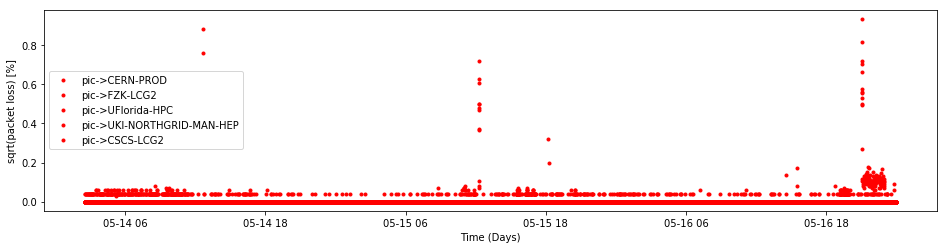

In [158]:
plt.figure(figsize=[16, 17])
gs = gridspec.GridSpec(4, 1)

ax0 = plt.subplot(gs[1])
ax0.plot(Fpl1.timestamp.tolist(), np.sqrt(Fpl1.packet_loss).tolist(), ls='', marker='.', c='r', label=sS1+'->'+dS1)
ax0.set_xlabel('Time (Days)')
ax0.set_ylabel('sqrt(packet loss) [%]')
ax0.legend()

ax2 = plt.subplot(gs[1])
ax2.plot(Fpl2.timestamp.tolist(), np.sqrt(Fpl2.packet_loss).tolist(), ls='', marker='.', c='r', label=sS2+'->'+dS2)
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('sqrt(packet loss) [%]')
ax2.legend()

ax4 = plt.subplot(gs[1])
ax4.plot(Fpl3.timestamp.tolist(), np.sqrt(Fpl3.packet_loss).tolist(), ls='', marker='.', c='r', label=sS3+'->'+dS3)
ax4.set_xlabel('Time (Days)')
ax4.set_ylabel('sqrt(packet loss) [%]')
ax4.legend()

ax6 = plt.subplot(gs[1])
ax6.plot(Fpl4.timestamp.tolist(), np.sqrt(Fpl4.packet_loss).tolist(), ls='', marker='.', c='r', label=sS4+'->'+dS4)
ax6.set_xlabel('Time (Days)')
ax6.set_ylabel('sqrt(packet loss) [%]')
ax6.legend()

ax8 = plt.subplot(gs[1])
ax8.plot(Fpl5.timestamp.tolist(), np.sqrt(Fpl5.packet_loss).tolist(), ls='', marker='.', c='r', label=sS5+'->'+dS5)
ax8.set_xlabel('Time (Days)')
ax8.set_ylabel('sqrt(packet loss) [%]')
ax8.legend()

plt.show()

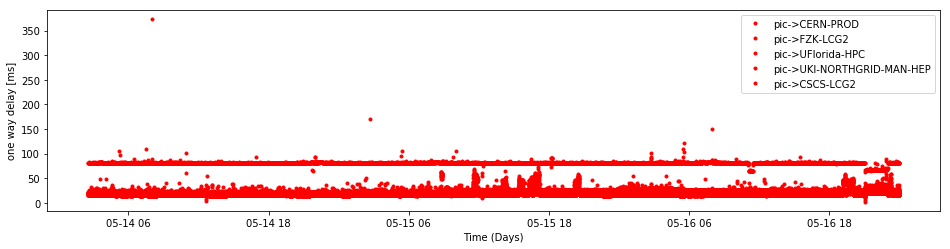

In [159]:
plt.figure(figsize=[16, 17])
gs = gridspec.GridSpec(4, 1)

ax1 = plt.subplot(gs[2])
ax1.plot(Fd1.timestamp.tolist(), Fd1.delay_mean.tolist(), ls='', marker='.', c='r', label=sS1+'->'+dS1)
ax1.set_xlabel('Time (Days)')
ax1.set_ylabel('one way delay [ms]')
ax1.legend()

ax3 = plt.subplot(gs[2])
ax3.plot(Fd2.timestamp.tolist(), Fd2.delay_mean.tolist(), ls='', marker='.', c='r', label=sS2+'->'+dS2)
ax3.set_xlabel('Time (Days)')
ax3.set_ylabel('one way delay [ms]')
ax3.legend()

ax5 = plt.subplot(gs[2])
ax5.plot(Fd3.timestamp.tolist(), Fd3.delay_mean.tolist(), ls='', marker='.', c='r', label=sS3+'->'+dS3)
ax5.set_xlabel('Time (Days)')
ax5.set_ylabel('one way delay [ms]')
ax5.legend()

ax7 = plt.subplot(gs[2])
ax7.plot(Fd4.timestamp.tolist(), Fd4.delay_mean.tolist(), ls='', marker='.', c='r', label=sS4+'->'+dS4)
ax7.set_xlabel('Time (Days)')
ax7.set_ylabel('one way delay [ms]')
ax7.legend()

ax9 = plt.subplot(gs[2])
ax9.plot(Fd5.timestamp.tolist(), Fd5.delay_mean.tolist(), ls='', marker='.', c='r', label=sS5+'->'+dS5)
ax9.set_xlabel('Time (Days)')
ax9.set_ylabel('one way delay [ms]')
ax9.legend()

plt.show()

### Combining the dataframes

In [160]:
#print(Fpl1)

In [161]:
#print(Fpl2)

In [162]:
#print(Fpl3)

In [163]:
#Fpl1.set_index('timestamp').join(Fpl2.set_index('timestamp'))
#merged = Fpl1.join(Fpl2,rsuffix='_y')
#merged = Fpl1.join(Fpl2.set_index('packet_loss'), on='packet_loss')
#merged = Fpl1.merge(Fpl2, left_index=True, right_index=True, how='inner')
merged = pd.concat([Fpl1, Fpl2, Fpl3, Fpl4, Fpl5])
result = merged.sort_values('timestamp')
print(result)

              delay_mean  delay_median    delay_sd  packet_loss  \
1.494729e+12   20.220467        20.240    0.119848     0.001667   
1.494729e+12   15.136950        15.090    0.387190     0.000000   
1.494729e+12   20.324167        20.240    1.519797     0.000000   
1.494729e+12   15.428317        15.100    5.173534     0.000000   
1.494729e+12   21.234417        20.240   14.448697     0.000000   
1.494729e+12   18.272067        17.830    7.584541     0.000000   
1.494729e+12   15.129333        15.100    0.265368     0.000000   
1.494729e+12   81.726517        81.710    0.113680     0.000000   
1.494729e+12   20.356500        20.250    1.588387     0.000000   
1.494729e+12   21.435283        17.830   29.728602     0.000000   
1.494729e+12   15.150333        15.120    0.185216     0.000000   
1.494729e+12   20.248133        20.250    0.589430     0.001667   
1.494729e+12   81.741833        81.730    0.093766     0.000000   
1.494729e+12   15.188483        15.150    0.276396     0.00000

### Boosted Decision Trees

In [164]:
start_time = time.clock()

# predicted_flag_array = np.zeros((24*3600), dtype=np.int)
# auc_score_array = np.zeros((24*3600), dtype=np.float)
# score_holder_array = np.zeros(3600, dtype=np.float)
# anomaly_array = np.ones(3600, dtype=np.int)
# not_anomaly_array = np.zeros(3600, dtype=np.int)

In [165]:
n_series = 1
start_date = '2017-05-13 00:00:00'
end_date = '2017-05-20 23:59:59'

window = 24

In [166]:
def check_for_anomaly(ref, sub):
    
    y_ref = pd.Series([0] * ref.shape[0])
    X_ref = ref
    del X_ref['auc_score']
    
    y_sub = pd.Series([1] * sub.shape[0])
    X_sub=sub
    del X_sub['auc_score']
    
    # separate Reference and Subject into Train and Test
    X_ref_train, X_ref_test, y_ref_train, y_ref_test = train_test_split(X_ref, y_ref, test_size=0.3, random_state=50)
    X_sub_train, X_sub_test, y_sub_train, y_sub_test = train_test_split(X_sub, y_sub, test_size=0.3, random_state=50)
    
    # combine training ref and sub samples
    X_train = pd.concat([X_ref_train, X_sub_train])
    y_train = pd.concat([y_ref_train, y_sub_train])

    # combine testing ref and sub samples
    X_test = pd.concat([X_ref_test, X_sub_test])
    y_test = pd.concat([y_ref_test, y_sub_test])
    
    clf = AdaBoostClassifier(n_estimators=50)
    
    #train an AdaBoost model to be able to tell the difference between the reference and subject data
    clf.fit(X_train, y_train) 

    #Predict using the combined test data
    y_predict = clf.predict(X_test)
    
    # scores = cross_val_score(clf, X, y)
    # print(scores)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_predict) # calculate the false positive rate and true positive rate
    auc_score = auc(fpr, tpr) #calculate the AUC score
    print ( "auc_score = ", auc_score, "\tfeature importances:", clf.feature_importances_)
    
    if auc_score > 0.55: 
        plot_roc(fpr, tpr, auc_score)
        #filename='tree_'+sub.index.min().strftime("%Y-%m-%d_%H")
        #tree.export_graphviz(clf.estimators_[0] , out_file=filename +'_1.dot') 
        #tree.export_graphviz(clf.estimators_[1] , out_file=filename +'_2.dot') 
        
    return auc_score

In [167]:
def plot_roc(fpr,tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.plot([0, 1], [0, 1], linestyle='--', color='r',label='Luck', alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [168]:
start_date = result['timestamp'].min()
print(start_date)
end_date = result['timestamp'].max()
print(end_date)

#print(Fpl.index/1000 - 1502668800.0)

result2 = result.set_index('timestamp')
result2['auc_score']=0.5
print(result2)

2017-05-14 02:31:39
2017-05-16 23:59:53
                     delay_mean  delay_median    delay_sd  packet_loss  \
timestamp                                                                
2017-05-14 02:31:39   20.220467        20.240    0.119848     0.001667   
2017-05-14 02:31:55   15.136950        15.090    0.387190     0.000000   
2017-05-14 02:32:39   20.324167        20.240    1.519797     0.000000   
2017-05-14 02:32:55   15.428317        15.100    5.173534     0.000000   
2017-05-14 02:33:39   21.234417        20.240   14.448697     0.000000   
2017-05-14 02:33:40   18.272067        17.830    7.584541     0.000000   
2017-05-14 02:33:55   15.129333        15.100    0.265368     0.000000   
2017-05-14 02:34:02   81.726517        81.710    0.113680     0.000000   
2017-05-14 02:34:39   20.356500        20.250    1.588387     0.000000   
2017-05-14 02:34:40   21.435283        17.830   29.728602     0.000000   
2017-05-14 02:35:00   15.150333        15.120    0.185216     0.000000  

In [169]:
print(result2.index)

DatetimeIndex(['2017-05-14 02:31:39', '2017-05-14 02:31:55',
               '2017-05-14 02:32:39', '2017-05-14 02:32:55',
               '2017-05-14 02:33:39', '2017-05-14 02:33:40',
               '2017-05-14 02:33:55', '2017-05-14 02:34:02',
               '2017-05-14 02:34:39', '2017-05-14 02:34:40',
               ...
               '2017-05-16 23:58:50', '2017-05-16 23:58:50',
               '2017-05-16 23:58:53', '2017-05-16 23:59:22',
               '2017-05-16 23:59:25', '2017-05-16 23:59:26',
               '2017-05-16 23:59:32', '2017-05-16 23:59:50',
               '2017-05-16 23:59:50', '2017-05-16 23:59:53'],
              dtype='datetime64[ns]', name='timestamp', length=27211, freq=None)


timestamp =  2017-05-15 02:31:39
auc_score =  0.5 	feature importances: [ 0.16  0.76  0.06  0.02]
timestamp =  2017-05-15 03:31:39
auc_score =  0.5 	feature importances: [ 0.14  0.74  0.1   0.02]
timestamp =  2017-05-15 04:31:39
auc_score =  0.5 	feature importances: [ 0.06  0.84  0.08  0.02]
timestamp =  2017-05-15 05:31:39
auc_score =  0.5 	feature importances: [ 0.16  0.72  0.1   0.02]
timestamp =  2017-05-15 06:31:39
auc_score =  0.5 	feature importances: [ 0.12  0.76  0.1   0.02]
timestamp =  2017-05-15 07:31:39
auc_score =  0.5 	feature importances: [ 0.1   0.84  0.06  0.  ]
timestamp =  2017-05-15 08:31:39
auc_score =  0.538213505303 	feature importances: [ 0.34  0.58  0.08  0.  ]
timestamp =  2017-05-15 09:31:39
auc_score =  0.515680411867 	feature importances: [ 0.16  0.7   0.14  0.  ]
timestamp =  2017-05-15 10:31:39
auc_score =  0.5 	feature importances: [ 0.12  0.82  0.04  0.02]
timestamp =  2017-05-15 11:31:39
auc_score =  0.52720765235 	feature importances: [ 0.16  0.68  

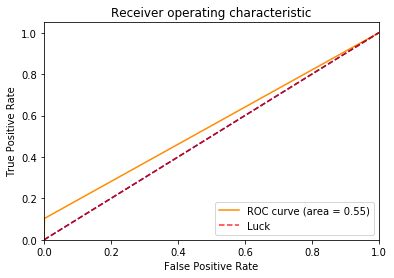

timestamp =  2017-05-15 16:31:39
auc_score =  0.499632217727 	feature importances: [ 0.26  0.64  0.08  0.02]
timestamp =  2017-05-15 17:31:39
auc_score =  0.499634769905 	feature importances: [ 0.2   0.76  0.04  0.  ]
timestamp =  2017-05-15 18:31:39
auc_score =  0.5 	feature importances: [ 0.34  0.64  0.    0.02]
timestamp =  2017-05-15 19:31:39
auc_score =  0.5 	feature importances: [ 0.34  0.58  0.08  0.  ]
timestamp =  2017-05-15 20:31:39
auc_score =  0.5 	feature importances: [ 0.18  0.72  0.1   0.  ]
timestamp =  2017-05-15 21:31:39
auc_score =  0.5 	feature importances: [ 0.2   0.74  0.06  0.  ]
timestamp =  2017-05-15 22:31:39
auc_score =  0.563629918469 	feature importances: [ 0.22  0.68  0.1   0.  ]


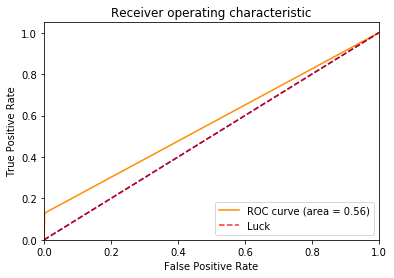

timestamp =  2017-05-15 23:31:39
auc_score =  0.5 	feature importances: [ 0.24  0.68  0.08  0.  ]
timestamp =  2017-05-16 00:31:39
auc_score =  0.518264535433 	feature importances: [ 0.24  0.72  0.04  0.  ]
timestamp =  2017-05-16 01:31:39
auc_score =  0.503825844653 	feature importances: [ 0.38  0.44  0.18  0.  ]
timestamp =  2017-05-16 02:31:39
auc_score =  0.507891325966 	feature importances: [ 0.18  0.6   0.22  0.  ]
timestamp =  2017-05-16 03:31:39
auc_score =  0.5 	feature importances: [ 0.18  0.68  0.14  0.  ]
timestamp =  2017-05-16 04:31:39
auc_score =  0.499828767123 	feature importances: [ 0.28  0.58  0.14  0.  ]
timestamp =  2017-05-16 05:31:39
auc_score =  0.511904761905 	feature importances: [ 0.22  0.7   0.08  0.  ]
timestamp =  2017-05-16 06:31:39
auc_score =  0.5 	feature importances: [ 0.26  0.64  0.08  0.02]
timestamp =  2017-05-16 07:31:39
auc_score =  0.5 	feature importances: [ 0.22  0.68  0.08  0.02]
timestamp =  2017-05-16 08:31:39
auc_score =  0.5 	feature impo

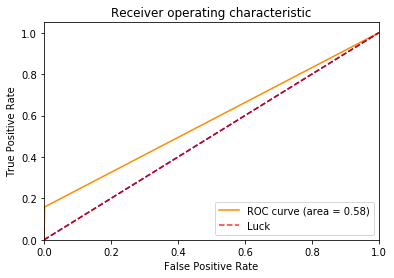

timestamp =  2017-05-16 21:31:39
auc_score =  0.861403883587 	feature importances: [ 0.36  0.48  0.12  0.04]


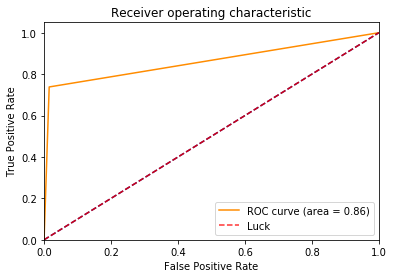

timestamp =  2017-05-16 22:31:39
auc_score =  0.499833831838 	feature importances: [ 0.18  0.68  0.12  0.02]


In [170]:
#find min and max timestamps

start = result2.index.min()
end = result2.index.max()

#round start 
start.seconds=0
start.minutes=0

ref = window * Hour()
sub = 1 * Hour()

# loop over them
ti=start+ref+sub
count=0
while ti < end + 1 * Minute():
    ref_start = ti-ref-sub
    ref_end = ti-sub
    ref_df = result2[(result2.index >= ref_start) & (result2.index < ref_end)]
    #print('ref_df = ', ref_df)
    #print("In while loop: ref_df: ", ref_df)
    sub_df = result2[(result2.index >= ref_end) & (result2.index < ti)]
    #print('sub_df = ', sub_df)
    #print("In while loop: sub_df: ", sub_df)
    
    ref_count = ref_df.shape[0]
    sub_count = sub_df.shape[0] 
    if ref_count < 10 or sub_count < 3:
        auc_score == 0.5
        ti = ti + sub
        count=count+1
        continue
    
    print("timestamp = ", ref_end)
    auc_score = check_for_anomaly(ref_df, sub_df)
    result2.loc[(result2.index>=ref_end) & (result2.index<=ti),['auc_score']] = auc_score
    #print(ti,"\trefes:" , ref_df.shape[0], "\tsubjects:", sub_df.shape[0], '\tauc:', auc_score)
    ti = ti + sub
    count=count+1
    


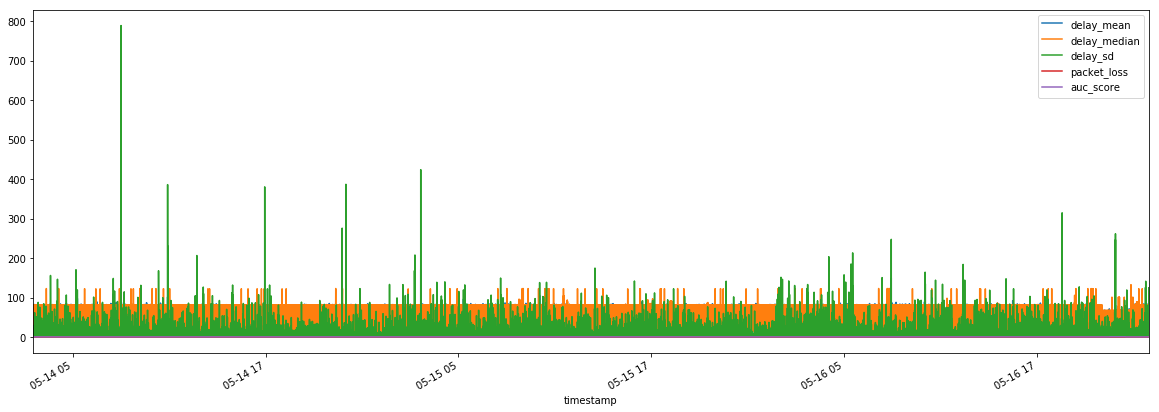

In [171]:
result2.plot(figsize=(20,7))


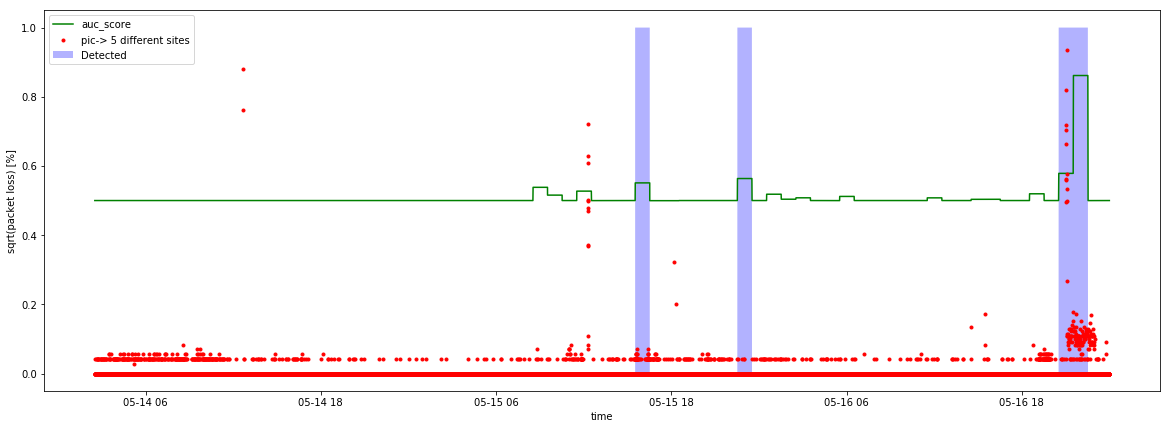

In [172]:
fig, ax = plt.subplots(figsize=(20,7))
result2.loc[:,'Detected'] = 0
result2.loc[result2.auc_score>0.55,'Detected']=1
result2.head()

ax.plot(result2.auc_score,'g')
ax.fill(result2.Detected, 'b', alpha=0.3)

ax.plot(result.timestamp.tolist(), np.sqrt(result.packet_loss).tolist(), ls='', marker='.', c='r', label=sS1+'-> 5 different sites')
ax.set_xlabel('time')
ax.set_ylabel('sqrt(packet loss) [%]')
ax.legend()

plt.show()

In [173]:
result2_avg_pkt_holder = result2.packet_loss
#holds all the auc scores

timestamp_np = np.array([])
pkt_score_np = np.array([])

start = result2.index.min()
end = result2.index.max()

#round start 
start.seconds=0
start.minutes=0

ref = window * Hour()
sub = 1 * Hour()

# loop over them
ti=start
count=0
while ti < end + 1 * Minute():
#while start < end:
    ref_start = ti
    ref_end = ti+sub
    
    
    timestamp_np = np.append(timestamp_np, ref_start)
    #create a dataframe that stores the starting time of the each hour
    
    result2_avg_pkt = math.sqrt(result2_avg_pkt_holder[ref_start:ref_end].mean())
    #average packet loss score for every hour    
    
    pkt_score_np = np.append(pkt_score_np, result2_avg_pkt)
    
    #start = start + sub
    
    ti = ti + sub
    #count=count+1
    #if count>2: break

timestamp1_df = pd.DataFrame(timestamp_np[:], columns=['timestamp'])
pkt_score1_df = pd.DataFrame(pkt_score_np[:], columns=['avg_packet_loss'])

pkt_avg_df1 = pd.concat([timestamp1_df, pkt_score1_df], axis=1)

pkt_avg_df2 = pkt_avg_df1.set_index('timestamp')

print(pkt_avg_df2)


                     avg_packet_loss
timestamp                           
2017-05-14 02:31:39         0.011547
2017-05-14 03:31:39         0.013456
2017-05-14 04:31:39         0.013561
2017-05-14 05:31:39         0.011587
2017-05-14 06:31:39         0.013106
2017-05-14 07:31:39         0.012546
2017-05-14 08:31:39         0.012747
2017-05-14 09:31:39         0.015062
2017-05-14 10:31:39         0.011587
2017-05-14 11:31:39         0.004811
2017-05-14 12:31:39         0.061700
2017-05-14 13:31:39         0.005709
2017-05-14 14:31:39         0.006094
2017-05-14 15:31:39         0.007464
2017-05-14 16:31:39         0.006823
2017-05-14 17:31:39         0.004811
2017-05-14 18:31:39         0.004303
2017-05-14 19:31:39         0.004811
2017-05-14 20:31:39         0.003043
2017-05-14 21:31:39         0.003043
2017-05-14 22:31:39         0.003077
2017-05-14 23:31:39         0.002155
2017-05-15 00:31:39         0.003727
2017-05-15 01:31:39         0.002143
2017-05-15 02:31:39         0.002140
2

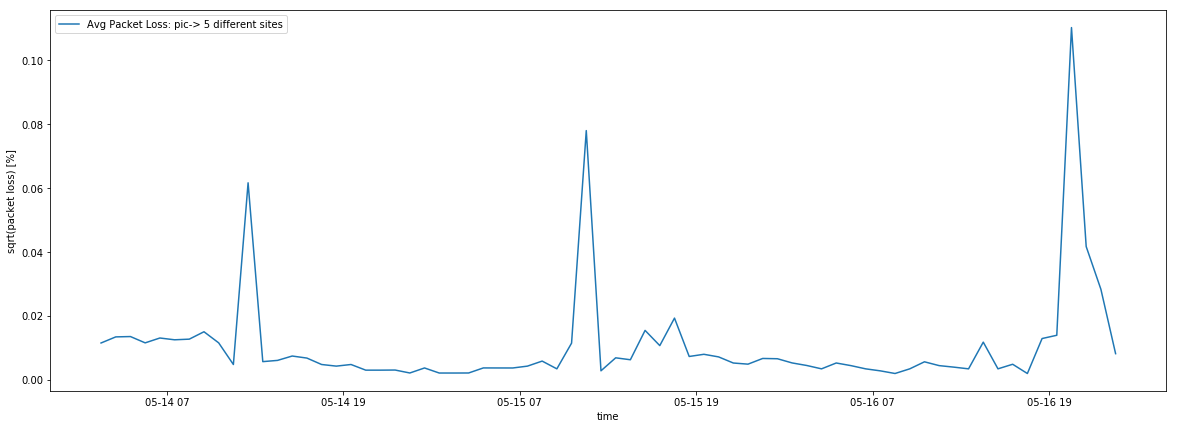

In [174]:
fig, ax = plt.subplots(figsize=(20,7))
#pkt_avg_df2.plot(figsize=(20,7))
ax.plot(timestamp1_df, pkt_avg_df2, label='Avg Packet Loss: '+sS1+'-> 5 different sites')
ax.set_xlabel('time')
ax.set_ylabel('sqrt(packet loss) [%]')
ax.legend()

plt.show()

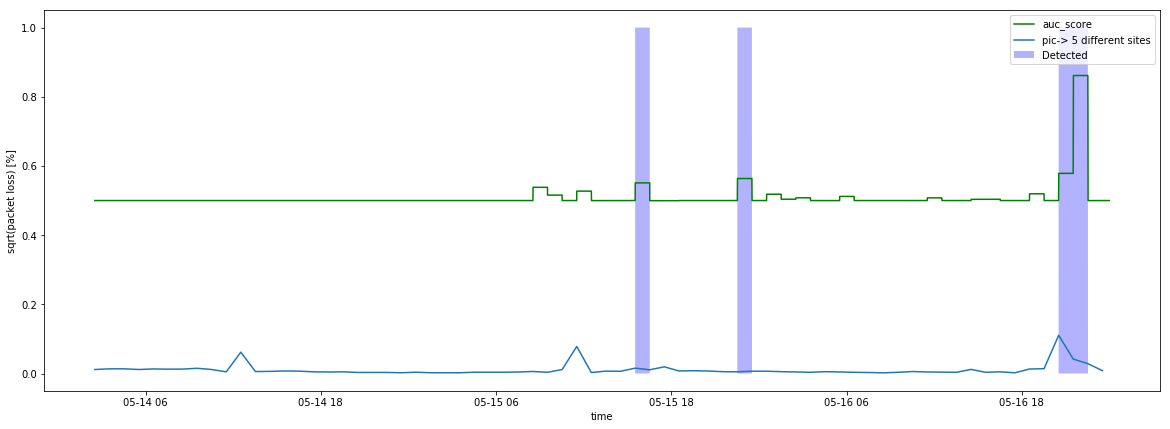

In [175]:
fig, ax = plt.subplots(figsize=(20,7))
result2.loc[:,'Detected'] = 0
result2.loc[result2.auc_score>0.55,'Detected']=1
result2.head()

ax.plot(result2.auc_score,'g')
ax.fill(result2.Detected, 'b', alpha=0.3)

ax.plot(timestamp1_df, pkt_avg_df2, label=sS1+'-> 5 different sites')
ax.set_xlabel('time')
ax.set_ylabel('sqrt(packet loss) [%]')
ax.legend()

plt.show()